In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier#importar el clasificador
from sklearn.model_selection import train_test_split # importar funciones de particion
from sklearn import metrics
# import six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from  IPython.display import Image
import pydotplus

/home/rb/Platzi/Escuela de Data Science/13.- Curso de Fundamentos de Estadística y Análisis de Datos con Python/probabilidad_estadistica/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [2]:
df = pd.read_csv('rating-peliculas.csv')

In [3]:
df.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [4]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [5]:
# definimos variableobjetivo 
y = df.genero
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [6]:
len(y)

559

In [7]:
X = df.drop(['pelicula', 'genero'], axis=1)

In [8]:
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [9]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
y_pred

array(['Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Action',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Action', 'Drama', 'Action', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Action',
       'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Action', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Comedy',
       'Action', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action',
       'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy',
       

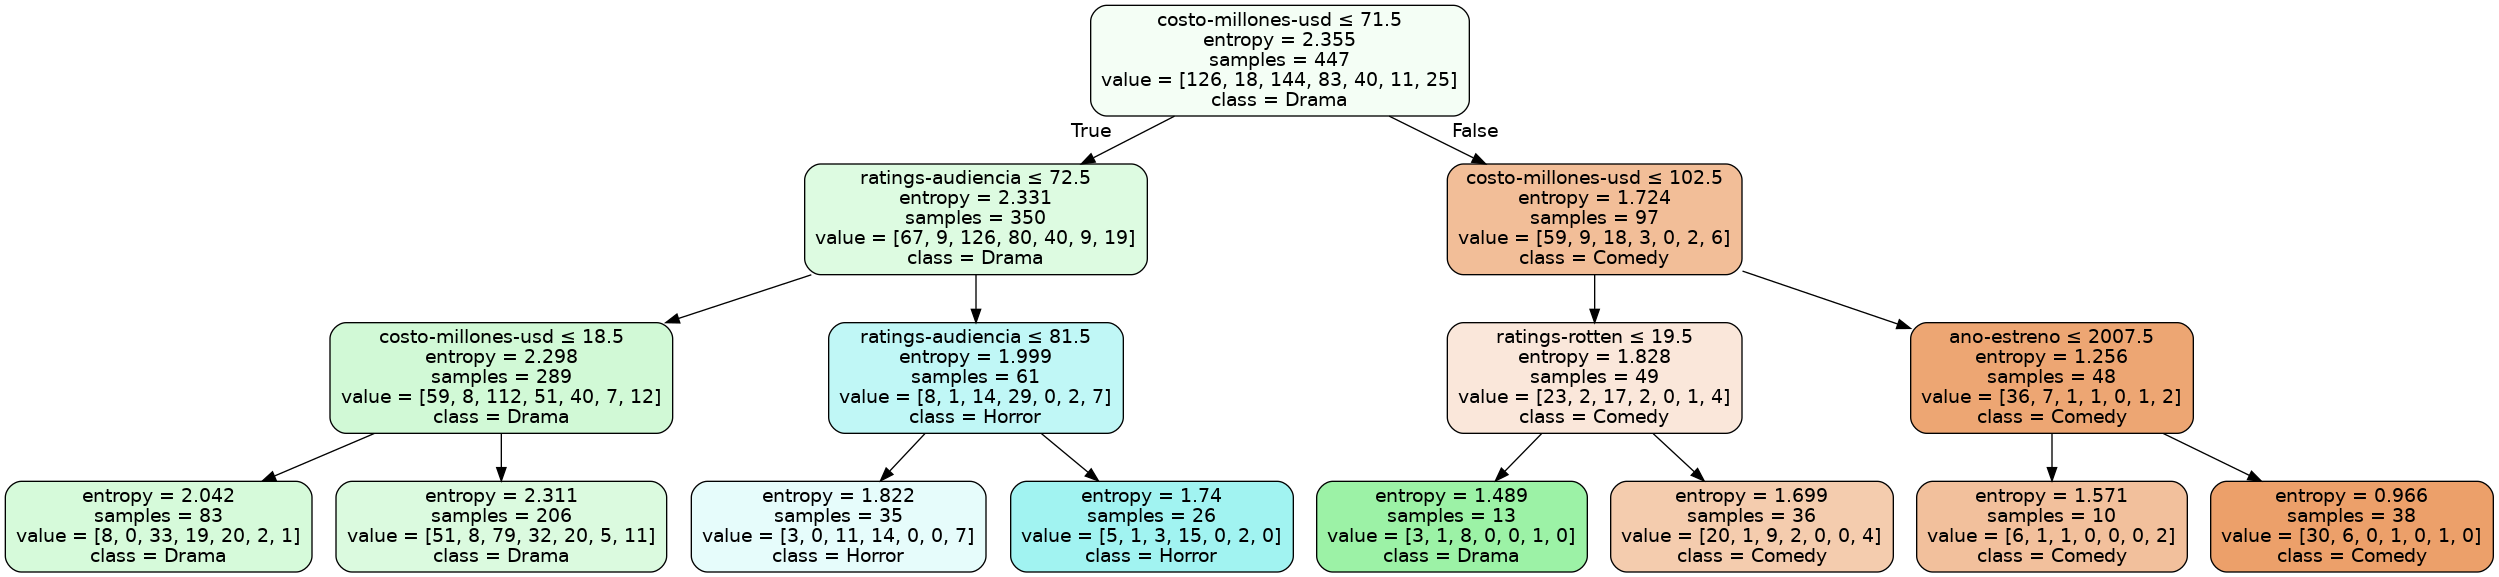

In [12]:
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
               special_characters=True, feature_names= X.columns, 
                class_names=y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('peliculas.png')
Image(graph.create_png())

In [13]:
#revisamos la precision de la prediccion
metrics.accuracy_score(y_test, y_pred)

0.375